In [1]:
import sys
import os
import numpy as np
from typing import List
import matplotlib.pyplot as plt

import parse
import features
import plot
import classification


In [2]:
# Specify path to raw data file.
RAW_DATA_FILE = os.path.join(os.environ["HOME"], "data", "accelerometer", "WISDM_ar_v1.1", "WISDM_ar_v1.1_raw.txt")

# Plotting options
FLAG_PLOT = False


In [3]:
# Read and parse data from file.
raw_data = parse.file_to_string(RAW_DATA_FILE)
raw_measurements = parse.timepoint_strings_to_timepoint_tuples(
    parse.raw_data_string_to_timepoint_strings(raw_data)
)
user_ids = parse.extract_user_set(raw_measurements)
activities = parse.extract_activity_set(raw_measurements)
print(activities)
print(user_ids)

{'Jogging', 'Walking', 'Downstairs', 'Standing', 'Upstairs', 'Sitting'}
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36}


In [4]:
raw_times = np.array([x[2] for x in raw_measurements])
raw_time_differences = raw_times[1:] - raw_times[:-1]

In [5]:
# Plot measurement times (in nanoseconds) for whole data set.
if FLAG_PLOT: figure, axis = plot.overlay_series(np.arange(0, len(raw_times)), [raw_times])

In [6]:
raw_accelerations = []
for column in [3, 4, 5]:
    raw_accelerations.append(np.array([v[column] for v in raw_measurements]))

In [7]:
# Plot segment of raw acceleration data against row number.
if FLAG_PLOT:
    start =  196400
    finish = 196800
    figure, axis = plot.overlay_series(np.arange(0, len(raw_times))[start: finish],
                                       [x[start: finish] for x in raw_accelerations])

In [8]:
# Parse raw data into 10 second intervals.
nanoseconds_in_one_second = 1000000000
nanoseconds_in_10_seconds = 10000000000
intervals: dict = parse.intervals_by_user_and_activity(
    raw_measurements,
    interval_duration_in_nanoseconds=nanoseconds_in_10_seconds,
    maximum_gap_in_nanoseconds=(nanoseconds_in_one_second * 3)
)

In [9]:
# Count number of intervals for each user and activity
all_counts = parse.count_intervals(intervals)
activity_counts = parse.count_intervals_per_activity(intervals)
user_counts = parse.count_intervals_per_user(intervals)
print(activity_counts)
print(user_counts)

{'Jogging': 1727, 'Walking': 2127, 'Downstairs': 489, 'Standing': 237, 'Upstairs': 599, 'Sitting': 294}
{1: 147, 2: 116, 3: 171, 4: 54, 5: 138, 6: 145, 7: 153, 8: 202, 9: 64, 10: 169, 11: 155, 12: 160, 13: 182, 14: 189, 15: 139, 16: 102, 17: 141, 18: 163, 19: 221, 20: 281, 21: 173, 22: 109, 23: 127, 24: 128, 25: 67, 26: 159, 27: 171, 28: 104, 29: 188, 30: 124, 31: 218, 32: 175, 33: 193, 34: 177, 35: 110, 36: 158}


In [10]:
# Select random examples of each activity.

sampled_users = 33
samples_per_user = 1

np.random.seed(42)
examples = dict()
random_users = np.random.choice(list(user_ids), sampled_users)
for activity in activities:
    for user in random_users:
        if len(intervals[(user, activity)]) >= samples_per_user:
            examples[(user, activity)] = np.random.choice(intervals[(user, activity)], samples_per_user)


In [11]:
if FLAG_PLOT: plot.intervals_by_activity(examples, ["Upstairs", "Downstairs"])

In [12]:
if FLAG_PLOT: plot.intervals_by_activity(examples, ["Walking", "Jogging"])

In [13]:
if FLAG_PLOT: plot.intervals_by_activity(examples, ["Sitting", "Standing"])

In [14]:
def _shuffled_sequence(length):
    seq = list(range(length))
    np.random.shuffle(seq)  # Numpy does this in place.
    return tuple(seq)


In [15]:
# # Create train-test folds
# np.random.seed(5)
# sequence = _shuffled_sequence(len(user_ids))
# folds = classification.train_test_folds(list(user_ids), sequence, 3)

In [16]:
# Calculate features for all data intervals
mean_abs_magnituede_changes = features.calculate_for_dict(
    intervals, features.mean_absolute_magnitude_change_per_second
)
mean_angle_changes = features.calculate_for_dict(intervals, features.mean_angle_change_per_second)


In [17]:
def collect_feature_values_for_activity(feature_values, activities):
    activity_feature_values = dict()
    for activity in activities:
        activity_feature_values[activity] = parse.collect_results_for_activity(
            feature_values, activity
        )
    return activity_feature_values


In [18]:
activity_mean_abs_magnitude_change = collect_feature_values_for_activity(
    mean_abs_magnituede_changes, activities
)
activity_mean_angle_change = collect_feature_values_for_activity(
    mean_angle_changes, activities
)

In [19]:
def feature_histograms(activity_feature_values, activities, bins):
    for activity in activities:
        plt.figure(figsize=(15,5))
        n, bins, patches = plt.hist(
            np.array(activity_feature_values[activity]),
            bins=bins,
            normed=1, facecolor='blue', alpha=0.5)
        plt.title(activity)
        plt.show()


In [20]:
FLAG_PLOT = True

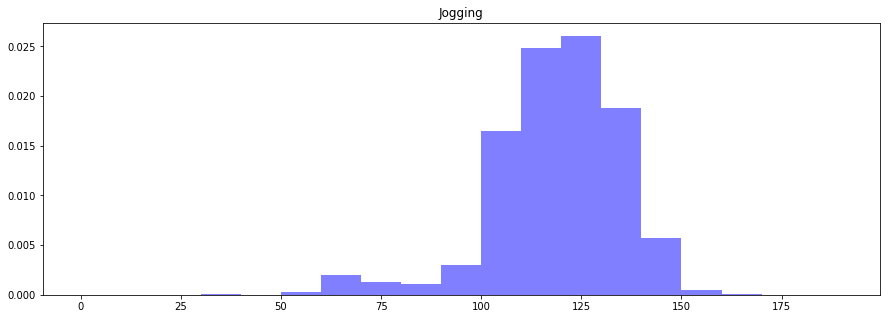

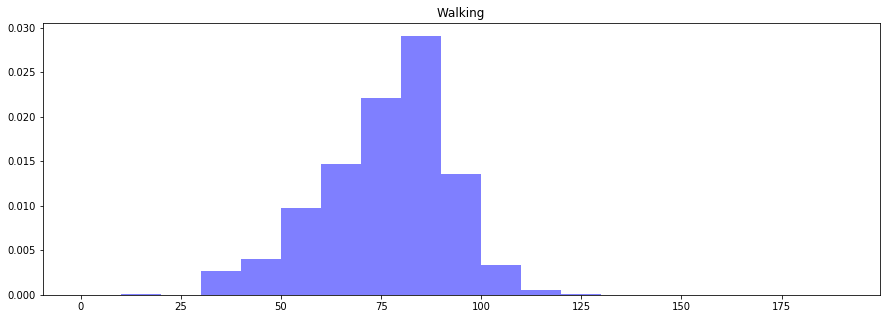

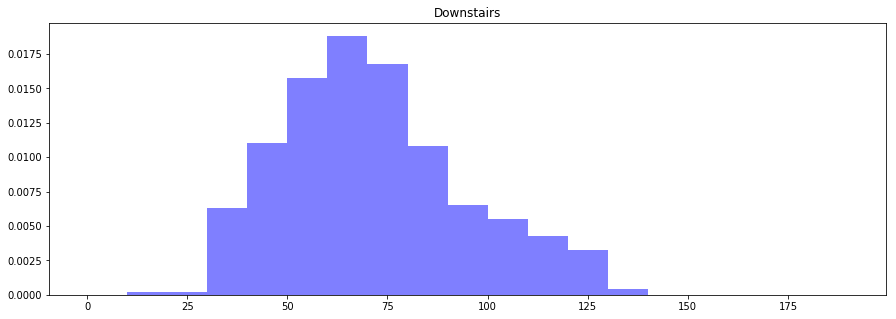

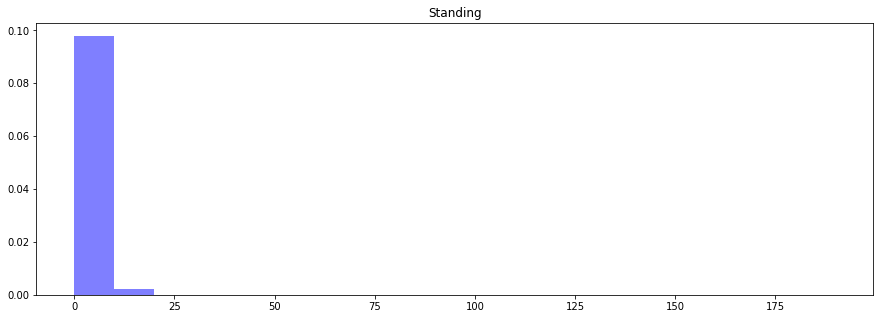

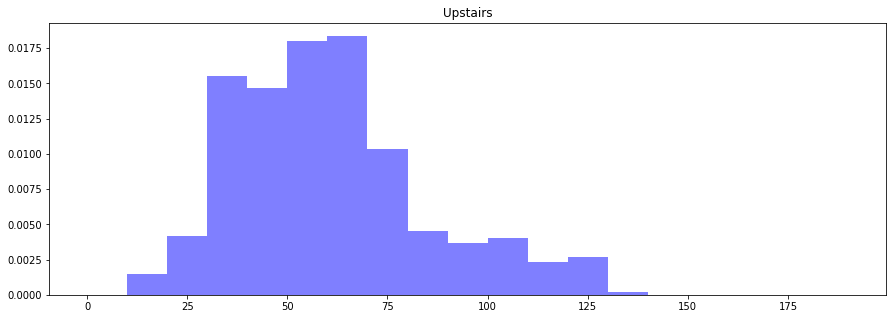

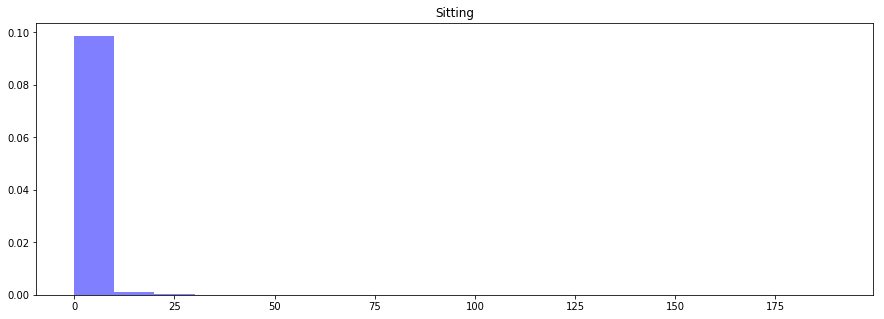

In [21]:
if FLAG_PLOT: feature_histograms(activity_mean_abs_magnitude_change, activities, bins=np.arange(0, 200, 10))

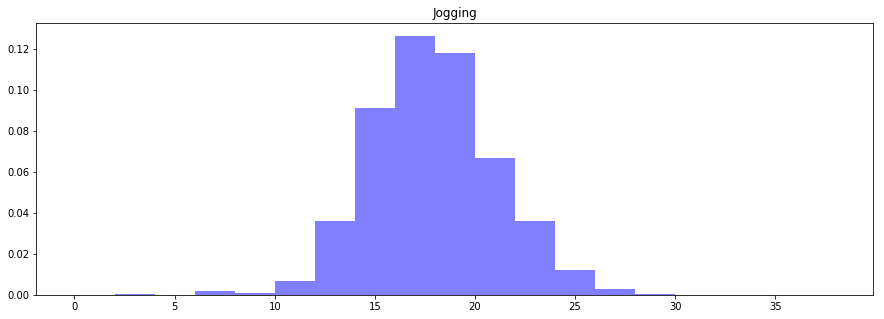

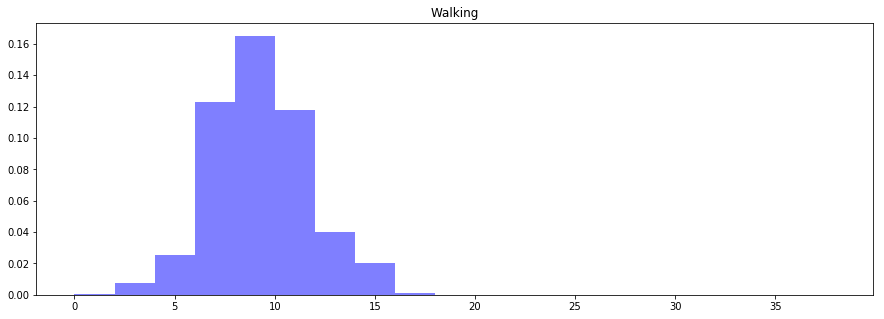

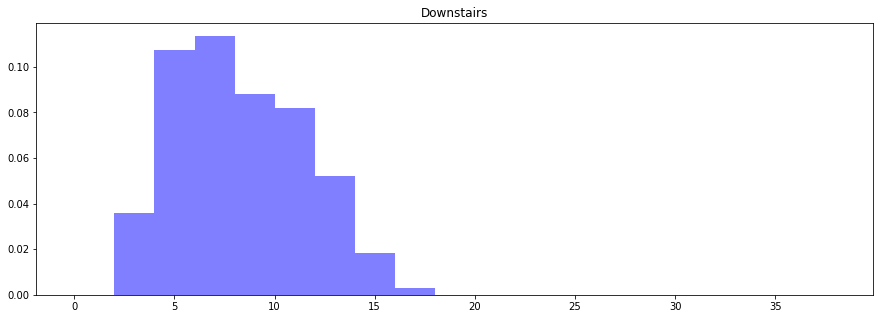

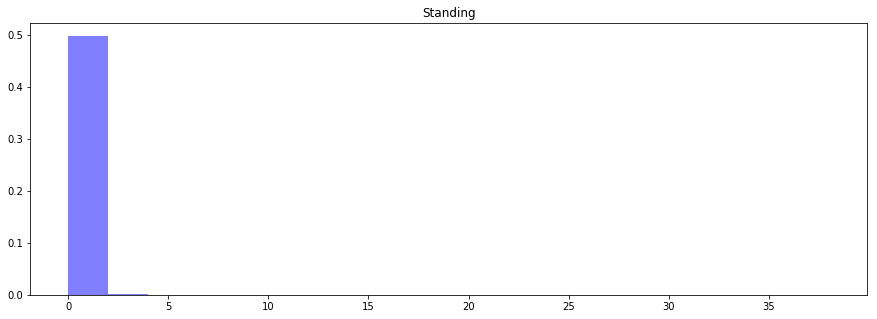

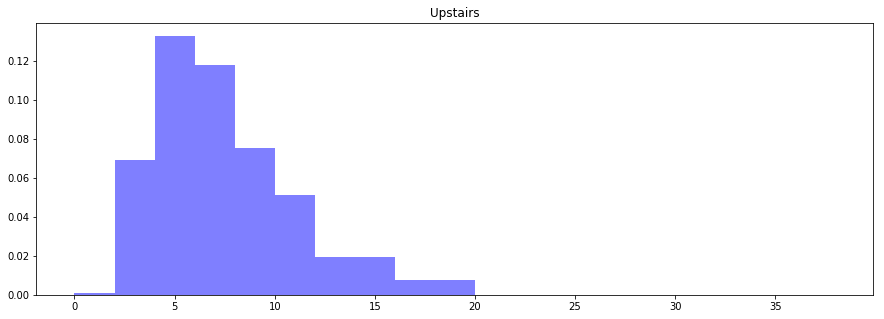

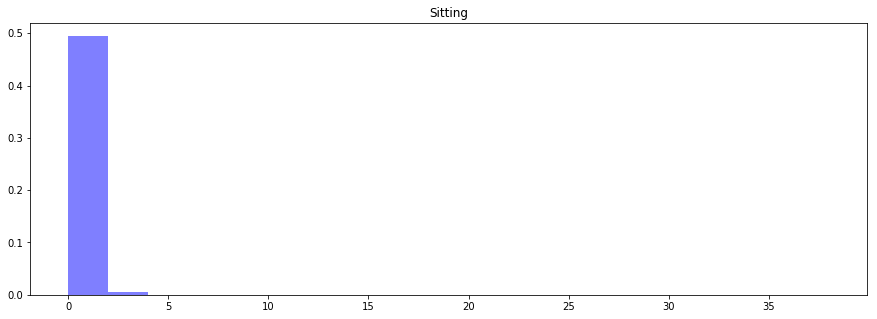

In [22]:
if FLAG_PLOT: feature_histograms(activity_mean_angle_change, activities, bins=np.arange(0, 40, 2),)

In [23]:
# ii = intervals[(1, 'Downstairs')]

In [24]:
# features.calculate_for_measurements(ii[2], features.mean_absolute_magnitude_change_per_second)

In [25]:
# 

In [26]:
# measurements = examples[(2, "Jogging")][0]

In [27]:
# t, x, y, z = parse.relative_time_and_accelerations(measurements)

In [28]:
i11 = intervals[(11, 'Walking')]

In [29]:
len(i11[0])

198